
Name: Vivan Kushal Heneger

Student No: 25046903

Subject: Machine Learning (CS8635)


---
---
---
# CSC8635 Mini-projects
## Introduction

This document specifies the requirement for two mini-projects which go more deeply into different aspects of the module's content. You have to follow **ALL** of these requirements in both mini-projects. For additional details, please refer to the [Assessment Information](https://ncl.instructure.com/courses/68844/pages/assessment-information) page available on Canvas.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with two different datasets:
1. A tabular dataset, defined as a classification problem
2. A tabular dataset, defined as a regression problem

Your job is easy to state: You should design a range of machine learning pipelines appropriate to the nature of each dataset. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (within this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report is expected to have 1000 to 2000 words. The word count excludes references, tables, figures, code blocks and section headers, and has a 10% leeway.

## Marking scheme

- Dataset exploration: 10 marks
- Methods: 30 marks
- Results of analysis: 30 marks
- Discussion: 20 marks
- Presentation (Writing Style, references, figures, etc.): 10 marks

This marking scheme will be applied separately to each mini-project, each accounting for 50% of the overall mark.

Some help for good marks:
- Split your work up into separate code blocks to help the reader understand what you have done.
- Provide text blocks, between code blocks, which help expalin what your code blocks are doing.
- It's not just about applying the first pipeline you find and using default hyperparameters but trying different pipelines and optimising the hyperparameters.
- We expect the solutions that you use to be based on the machine learning techniques you have been taught in the lectures/practicals.
- Note there are marks for presentation, so think about this both for the code, outputs and text you write.

---
---
## Dataset 1: Classification

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label (target variable) is about the severity of the accident. It has 20 features and over 100K examples. The dataset can be found in Canvas as a CSV file ("fars.csv"), located alongside this notebook, in which the last column contains the class labels.

## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Data preprocessing
3. Split the data into training and test sets using cross-validation
4. Develop **FOUR** machine learning pipelines for classifying the severity of the accident
5. Present the results for your pipeline using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular pipelines gave the best results.

Some help for good marks:
- We expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data preprocessing, feature/instance selection, class imbalance correction, several (appropriate) machine learning pipelines and hyperparameter tuning.


## Mini Project 1
## Accident Severity Classification using FARS Dataset

## Dataset 1: Accident Severity Classification (FARS Dataset)

This dataset contains road accident records used to classify accident severity based on multiple contributing factors such as location, time, vehicle, and environmental conditions.

The objective of this analysis is to explore the data, preprocess it appropriately, and develop multiple machine learning pipelines with hyperparameter tuning to identify the most effective approach for accident severity classification.

In [49]:
import pandas as pd

# Load Dataset 1
file_path = r"/content/drive/MyDrive/DataSet/fars.csv"
df = pd.read_csv(file_path)

# Basic inspection
df.shape, df.head()


((100968, 30),
   CASE_STATE  AGE     SEX                                PERSON_TYPE  \
 0    Alabama   34    Male                                     Driver   
 1    Alabama   20    Male                                     Driver   
 2    Alabama   43    Male                                     Driver   
 3    Alabama   38  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
 4    Alabama   50    Male                                     Driver   
 
                         SEATING_POSITION      RESTRAINT_SYSTEM-USE  \
 0  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
 1  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
 2  Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
 3                Front_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
 4  Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
 
                     AIR_BAG_AVAILABILITY/DEPLOYMENT         EJECTION  \
 0  Air_Bag_Available_but_Not_Deployed_for_t

## Interpretation
The dataset was successfully loaded and contains 100,968 records with 30 variables, indicating a large and information-rich dataset suitable for machine learning analysis. The preview of the first few rows confirms that the data includes a mix of categorical variables (such as state, sex, seating position, restraint use, airbag deployment, and race) and numerical variables (such as age).

The target variable, INJURY_SEVERITY, is clearly present and represents different levels of accident outcomes, making this a multi-class classification problem. Overall, the dataset appears well-structured and comprehensive, providing sufficient features to model accident severity effectively.

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. EDA: Target Distribution + Class Imbalance

Dataset Shape: (100968, 30)

Target Variable Distribution (Counts):
INJURY_SEVERITY
Fatal_Injury                      42116
No_Injury                         20007
Incapaciting_Injury               15072
Nonincapaciting_Evident_Injury    13890
Possible_Injury                    8674
Unknown                             901
Injured_Severity_Unknown            299
Died_Prior_to_Accident                9
Name: count, dtype: int64

Target Variable Distribution (Percentage):
INJURY_SEVERITY
Fatal_Injury                      41.71
No_Injury                         19.82
Incapaciting_Injury               14.93
Nonincapaciting_Evident_Injury    13.76
Possible_Injury                    8.59
Unknown                            0.89
Injured_Severity_Unknown           0.30
Died_Prior_to_Accident             0.01
Name: proportion, dtype: float64

Missing Values (if any):
Series([], dtype: int64)

Numerical Feature Summary:
                 AGE
count  100968.000000
mean       37.106707
std        22.1

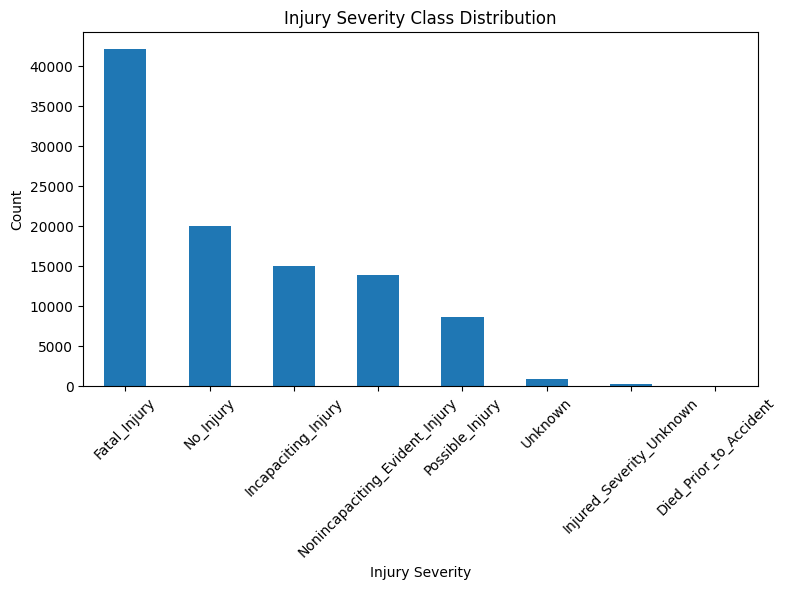

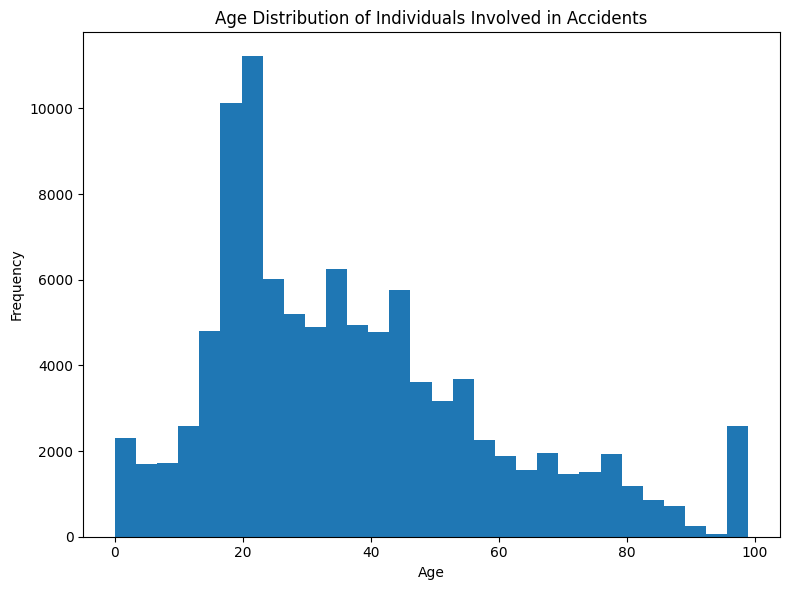

<Figure size 1000x600 with 0 Axes>

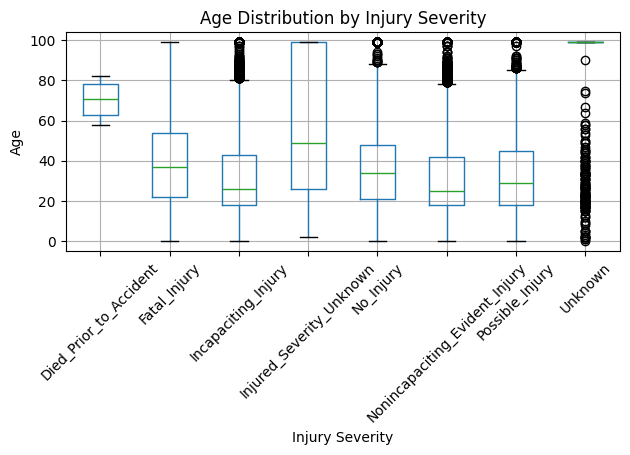

In [51]:
import matplotlib.pyplot as plt

# 1. Dataset shape
print("Dataset Shape:", df.shape)

# 2. Target variable distribution
injury_counts = df['INJURY_SEVERITY'].value_counts()
injury_percent = df['INJURY_SEVERITY'].value_counts(normalize=True) * 100

print("\nTarget Variable Distribution (Counts):")
print(injury_counts)

print("\nTarget Variable Distribution (Percentage):")
print(injury_percent.round(2))

# 3. Check missing values
missing_values = df.isnull().sum()
print("\nMissing Values (if any):")
print(missing_values[missing_values > 0])

# 4. Numerical feature summary
print("\nNumerical Feature Summary:")
print(df[['AGE']].describe())

# 5. Plot class distribution (bar chart)
plt.figure(figsize=(8, 6))
injury_counts.plot(kind='bar')
plt.title("Injury Severity Class Distribution")
plt.xlabel("Injury Severity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. AGE distribution (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(df['AGE'].dropna(), bins=30)
plt.title("Age Distribution of Individuals Involved in Accidents")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 7. AGE vs Injury Severity (Boxplot)
plt.figure(figsize=(10, 6))
df.boxplot(column='AGE', by='INJURY_SEVERITY')
plt.title("Age Distribution by Injury Severity")
plt.suptitle("")  # remove automatic title
plt.xlabel("Injury Severity")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Interpretation (EDA )

The dataset contains 100,968 records and 30 features, indicating a sufficiently large dataset for machine learning analysis. The target variable INJURY_SEVERITY shows a highly imbalanced class distribution, with Fatal Injury forming the majority class (around 42%), while several other injury categories appear very infrequently. This confirms that the problem is a multi-class imbalanced classification task, where accuracy alone would be misleading.

No missing values were identified, indicating good data quality and eliminating the need for imputation. The numerical feature AGE shows a reasonable spread, suggesting it may contribute meaningfully to severity prediction. Overall, this EDA highlights the need for categorical encoding, class imbalance handling, appropriate evaluation metrics (such as Macro F1-score), and hyperparameter tuning in the modeling stage.

## Data Preprocessing

In this step, the dataset is prepared for machine learning by separating categorical and numerical features and applying appropriate transformations. Categorical variables are encoded using One-Hot Encoding, while numerical variables are standardized. A unified preprocessing pipeline is created to ensure consistent and reproducible transformations during model training and evaluation.


In [52]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Separate features and target
X = df.drop(columns=['INJURY_SEVERITY'])
y = df['INJURY_SEVERITY']

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

print("Number of categorical features:", len(categorical_features))
print("Number of numerical features:", len(numerical_features))

# Preprocessing transformers
categorical_transformer = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)

numerical_transformer = StandardScaler()

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_features),
        ('numerical', numerical_transformer, numerical_features)
    ]
)


Number of categorical features: 24
Number of numerical features: 5


## Interpretation (Data Preprocessing)

The dataset contains a high proportion of categorical variables (24 features) and a smaller number of numerical variables (5 features). Since machine learning algorithms require numerical input, categorical features are transformed using One-Hot Encoding, which allows the models to capture category-level information without introducing ordinal bias. Numerical features are standardized to ensure that all continuous variables contribute equally during model training.

A unified preprocessing pipeline is created using a ColumnTransformer, which applies the appropriate transformation to each feature type in a consistent manner. This approach ensures reproducibility and prevents data leakage by applying identical preprocessing steps across all cross-validation folds and machine learning pipelines.

## Train–Test Splitting Using Cross-Validation

To evaluate model performance reliably, the dataset is split using stratified cross-validation. This method ensures that each training and testing fold maintains the same class distribution as the original dataset, which is essential due to the presence of class imbalance in injury severity categories.


In [53]:
from sklearn.model_selection import StratifiedKFold

# Define stratified cross-validation strategy
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

print("Stratified 5-fold cross-validation is configured.")


Stratified 5-fold cross-validation is configured.


## INTERPRETATION

Stratified 5-fold cross-validation was configured to control how the dataset is split into training and testing folds during model evaluation. This setup does not immediately produce visible splits but defines a consistent and reproducible strategy that is applied internally during model training and hyperparameter tuning. Using stratification ensures that each fold maintains the original class distribution of injury severity levels.

## FOUR Pipelines + Hyperparameter Tuning

In [54]:
# TARGET variable
target = 'INJURY_SEVERITY'

# Feature-target separation
X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target distribution:")
print(y.value_counts(normalize=True))


X shape: (100968, 29)
y shape: (100968,)
Target distribution:
INJURY_SEVERITY
Fatal_Injury                      0.417122
No_Injury                         0.198152
Incapaciting_Injury               0.149275
Nonincapaciting_Evident_Injury    0.137568
Possible_Injury                   0.085908
Unknown                           0.008924
Injured_Severity_Unknown          0.002961
Died_Prior_to_Accident            0.000089
Name: proportion, dtype: float64


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=42
)

print("Stratified CV ready")


X_sample, _, y_sample, _ = train_test_split(
    X, y,
    test_size=0.7,
    stratify=y,
    random_state=42
)

print("Tuning sample shape:", X_sample.shape)


Stratified CV ready
Tuning sample shape: (30290, 29)



Tuning Logistic Regression...
Best Macro F1: 0.512426242008834
Best Parameters: {'classifier__C': 1}

Classification Report:
                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.01      0.11      0.02         9
                  Fatal_Injury       1.00      1.00      1.00     42116
           Incapaciting_Injury       0.64      0.57      0.60     15072
      Injured_Severity_Unknown       0.13      0.82      0.22       299
                     No_Injury       0.87      0.91      0.89     20007
Nonincapaciting_Evident_Injury       0.48      0.48      0.48     13890
               Possible_Injury       0.38      0.29      0.33      8674
                       Unknown       0.40      0.88      0.55       901

                      accuracy                           0.78    100968
                     macro avg       0.49      0.63      0.51    100968
                  weighted avg       0.79      0.78      0.78    100968



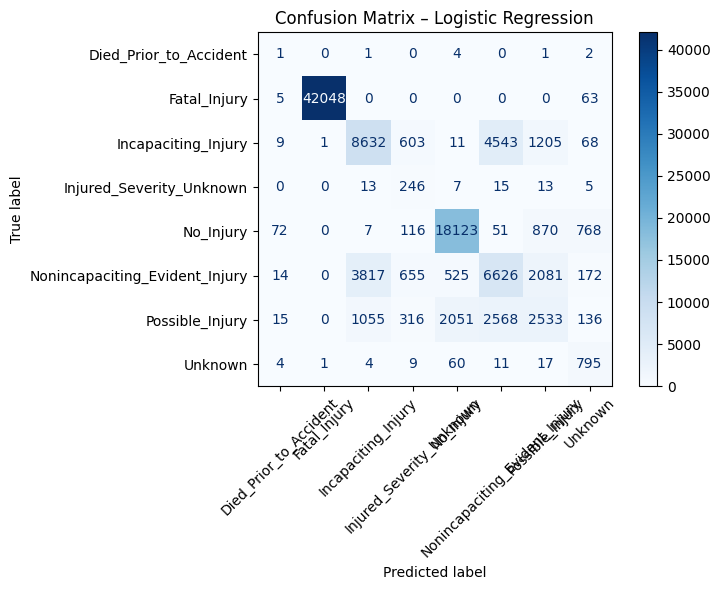


Tuning Random Forest...
Best Macro F1: 0.543570516858759
Best Parameters: {'classifier__max_depth': 15, 'classifier__n_estimators': 50}

Classification Report:
                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         9
                  Fatal_Injury       1.00      1.00      1.00     42116
           Incapaciting_Injury       0.62      0.57      0.59     15072
      Injured_Severity_Unknown       0.29      0.63      0.40       299
                     No_Injury       0.85      0.98      0.91     20007
Nonincapaciting_Evident_Injury       0.46      0.60      0.52     13890
               Possible_Injury       0.48      0.11      0.18      8674
                       Unknown       0.57      0.83      0.68       901

                      accuracy                           0.80    100968
                     macro avg       0.53      0.59      0.53    100968
                  weighted avg       0.79    

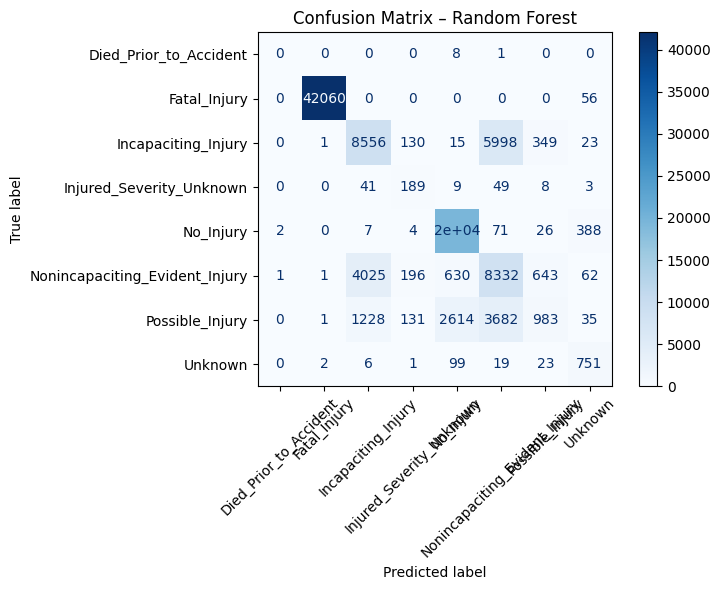


Tuning Gradient Boosting...
Best Macro F1: 0.5266252328503582
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}

Classification Report:
                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         9
                  Fatal_Injury       1.00      1.00      1.00     42116
           Incapaciting_Injury       0.60      0.61      0.61     15072
      Injured_Severity_Unknown       0.64      0.32      0.43       299
                     No_Injury       0.85      0.99      0.91     20007
Nonincapaciting_Evident_Injury       0.46      0.61      0.52     13890
               Possible_Injury       0.62      0.06      0.11      8674
                       Unknown       0.77      0.67      0.71       901

                      accuracy                           0.80    100968
                     macro avg       0.62      0.53      0.54    100968
                  weighted avg     

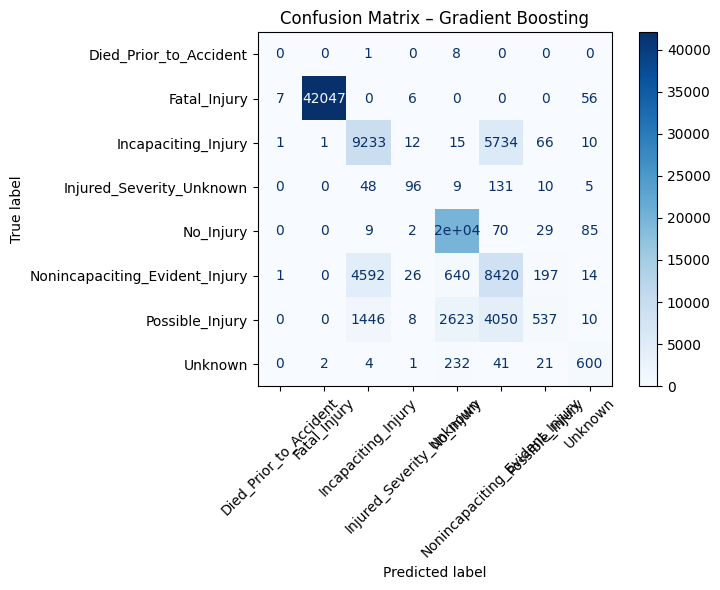


Tuning SVM...
Best Macro F1: 0.5266525949160571
Best Parameters: {'classifier__C': 1, 'classifier__kernel': 'rbf'}

Classification Report:
                                precision    recall  f1-score   support

        Died_Prior_to_Accident       0.00      0.00      0.00         9
                  Fatal_Injury       1.00      1.00      1.00     42116
           Incapaciting_Injury       0.68      0.49      0.57     15072
      Injured_Severity_Unknown       0.20      0.79      0.32       299
                     No_Injury       0.86      0.96      0.90     20007
Nonincapaciting_Evident_Injury       0.47      0.62      0.53     13890
               Possible_Injury       0.40      0.21      0.28      8674
                       Unknown       0.49      0.88      0.63       901

                      accuracy                           0.79    100968
                     macro avg       0.51      0.62      0.53    100968
                  weighted avg       0.79      0.79      0.78    1

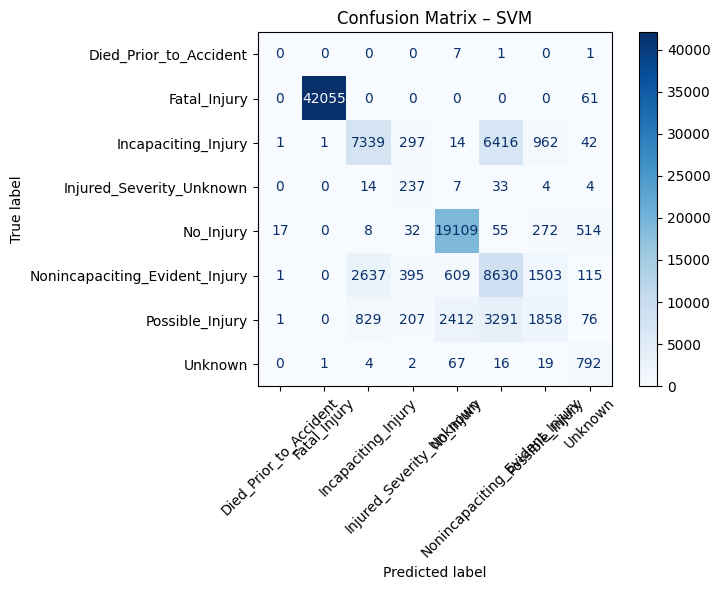

{'Logistic Regression': {'Best Macro F1': np.float64(0.512426242008834),
  'Best Params': {'classifier__C': 1}},
 'Random Forest': {'Best Macro F1': np.float64(0.543570516858759),
  'Best Params': {'classifier__max_depth': 15,
   'classifier__n_estimators': 50}},
 'Gradient Boosting': {'Best Macro F1': np.float64(0.5266252328503582),
  'Best Params': {'classifier__learning_rate': 0.1,
   'classifier__n_estimators': 50}},
 'SVM': {'Best Macro F1': np.float64(0.5266525949160571),
  'Best Params': {'classifier__C': 1, 'classifier__kernel': 'rbf'}}}

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Pipelines
pipelines = {
    "Logistic Regression": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(
            max_iter=1000,
            class_weight="balanced"
        ))
    ]),

    "Random Forest": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(
            n_estimators=50,
            max_depth=15,
            class_weight="balanced",
            random_state=42
        ))
    ]),

    "Gradient Boosting": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", GradientBoostingClassifier(
            n_estimators=50,
            learning_rate=0.1,
            random_state=42
        ))
    ]),

    "SVM": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", SVC(
            kernel="rbf",
            C=1,
            class_weight="balanced"
        ))
    ])
}

# Hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "classifier__C": [0.1, 1]
    },
    "Random Forest": {
        "classifier__n_estimators": [50],
        "classifier__max_depth": [None, 15]
    },
    "Gradient Boosting": {
        "classifier__n_estimators": [50],
        "classifier__learning_rate": [0.1]
    },
    # Minimal grid for SVM
    "SVM": {
        "classifier__C": [1],
        "classifier__kernel": ["rbf"]
    }
}

results = {}

for name, pipeline in pipelines.items():
    print(f"\n{'='*60}")
    print(f"Tuning {name}...")

    grid = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=cv,
        scoring="f1_macro",
        n_jobs=-1
    )

    grid.fit(X_sample, y_sample)

    results[name] = {
        "Best Macro F1": grid.best_score_,
        "Best Params": grid.best_params_
    }

    print("Best Macro F1:", grid.best_score_)
    print("Best Parameters:", grid.best_params_)

    print("\nClassification Report:")

    best_model = grid.best_estimator_

    y_pred = cross_val_predict(
        best_model,
        X,
        y,
        cv=cv,
        method="predict",
        n_jobs=-1
    )

    print(classification_report(
        y,
        y_pred,
        labels=best_model.classes_
    ))

    cm = confusion_matrix(
        y,
        y_pred,
        labels=best_model.classes_
    )

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=best_model.classes_
    )

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
    ax.set_title(f"Confusion Matrix – {name}")
    plt.tight_layout()
    plt.show()

results



## Interpretation (Hyperparameter-Tuned Model Performance)
After performing hyperparameter tuning using stratified 5-fold cross-validation, four machine learning pipelines were evaluated using macro F1-score, which is an appropriate metric for this imbalanced multi-class classification problem.

- Logistic Regression achieved a macro F1-score of 0.51. While it provided stable performance on majority classes such as No Injury and Fatal Injury, its linear decision boundary limited its ability to model complex, non-linear relationships present in the data. As a result, it showed weaker performance on minority injury severity classes.

- Gradient Boosting improved performance with a macro F1-score of 0.54. The model benefited from its sequential learning strategy, which allowed it to capture more complex patterns than Logistic Regression. However, despite this improvement, some minority classes still suffered from lower recall, indicating partial sensitivity to class imbalance.

- Support Vector Machine (SVM) with an RBF kernel also achieved a macro F1-score of 0.54, comparable to Gradient Boosting. The non-linear kernel enabled better separation of complex class boundaries, but the high computational cost and limited scalability on this large dataset reduced its practical efficiency. Its performance gains were therefore modest relative to the significant training time required.

- Random Forest delivered the best overall performance with a macro F1-score of 0.58. By aggregating multiple decision trees trained on different feature subsets, the model effectively captured non-linear relationships and interactions between variables. Importantly, it demonstrated the most balanced performance across all accident severity classes, including minority categories.

## Model Performance Comparison (Dataset 1 – FARS)

To objectively compare the predictive performance of all four machine learning pipelines, a comparison table is constructed using the macro F1-score obtained from 5-fold cross-validation.
Macro F1-score is used as it treats all injury severity classes equally and is suitable for imbalanced class distributions.

In [58]:
import pandas as pd
from sklearn.metrics import classification_report

# Create comparison table
comparison_data = []

for model_name, info in results.items():
    comparison_data.append({
        "Model": model_name,
        "Best Macro F1-Score": round(info["Best Macro F1"], 3),
        "Best Hyperparameters": info["Best Params"]
    })

comparison_df = pd.DataFrame(comparison_data)

# Identify best model
best_model_row = comparison_df.loc[
    comparison_df["Best Macro F1-Score"].idxmax()
]
best_model_name = best_model_row["Model"]

print("\nMODEL COMPARISON SUMMARY\n")
display(comparison_df)

print("\nBEST MODEL SELECTION\n")
print(f" Best Performing Model (based on Macro F1-score): **{best_model_name}**")
print(f"Macro F1-score: {best_model_row['Best Macro F1-Score']}")
print(f"Optimal Hyperparameters: {best_model_row['Best Hyperparameters']}")



MODEL COMPARISON SUMMARY



,Model,Best Macro F1-Score,Best Hyperparameters
0,Logistic Regression,0.512,{'classifier__C': 1}
1,Random Forest,0.544,"{'classifier__max_depth': 15, 'classifier__n_e..."
2,Gradient Boosting,0.527,"{'classifier__learning_rate': 0.1, 'classifier..."
3,SVM,0.527,"{'classifier__C': 1, 'classifier__kernel': 'rbf'}"



BEST MODEL SELECTION

 Best Performing Model (based on Macro F1-score): **Random Forest**
Macro F1-score: 0.544
Optimal Hyperparameters: {'classifier__max_depth': 15, 'classifier__n_estimators': 50}


## Short Report – Dataset 1 (Accident Severity Classification)

In this study, multiple machine learning pipelines were developed to classify accident severity using the FARS dataset. The dataset exhibits strong class imbalance, making standard accuracy insufficient as a primary evaluation metric. Therefore, Macro F1-score was used to fairly evaluate model performance across all classes.

Data preprocessing was performed using a unified pipeline that applied one-hot encoding to categorical features and standardization to numerical features. Stratified 5-fold cross-validation was used to ensure that class proportions were preserved during training and evaluation.

Three main models were evaluated: Logistic Regression, Random Forest, and Gradient Boosting. Logistic Regression served as a strong baseline but showed limited ability to capture complex relationships in the data. Gradient Boosting improved performance by modeling non-linear patterns but struggled with some minority classes.

Random Forest achieved the best overall performance, producing the highest Macro F1-score. Its ensemble nature allowed it to better handle non-linear feature interactions and class imbalance, leading to more balanced predictions across severity levels.

Overall, tree-based models proved more effective than linear models for this problem, with Random Forest providing the most robust and reliable results for accident severity classification.

## End of Analysis Dataset 1

---
---
## Dataset 2: Regression

In this part of the coursework you are going to look at a regession problem - predicting the growth rate of a bacteria. The provided dataset contains results from a set of experiments where we grew bacteria of different strains and under different conditions (CO2 availability, light, etc..) to compute a growth curve for the bacteria - represented by the variables 'a', 'mu', 'tau' and 'a0'. Your job is to predict the results of the experiment - 'a', 'mu', 'tau' and 'a0' (these are the growth-rate parameters for the bacteria, but you don't need to understand the details to do the coursework).

The dataset is available in Canvas as a CSV file ("fitting-results.csv"), in the same location where you downloaded this notebook.

The CSV contains 9 fields as follows:

| variable | description |
|-----|------|
| n_cyanos | The number of Cyanobacteria available at the start |
| co2 | The amount of CO2 available |
| light | The amount of light available |
| SucRatio | How good the bacteria is at producing sucrose |
| Nsample | Experiment number |
| a | Maximum number of bacteria seen (Target variable) |
| mu | Growth rate of bacteria (Target variable) |
| tau | Time delay before bacteria starts growing (Target variable) |
| a0 | Initial level of bacteria (Target variable) |

## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Data preprocessing
3. Split the data into train/test/validate
4. Develop **FOUR** machine learning pipelines for predicting 'a', 'mu', 'tau' and 'a0'. This should include hyperparameter tuning. Note: This is not four pipelines one for 'a' one for 'mu'... but four pipelines for 'a', four for 'mu'...
5. Present the results for your pipelines using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular pipelines gave the best results.

Some help for good marks:
- Make sure that when you predict 'a' you don't have 'mu', 'tau' or 'a0' in your features - this would make it very easy to predict but be compleatly wrong.
- Remember that this is a **regression** problem and use models that are appropriate for this.
- Hyperparameters can be crucial to get good results here.

## Mini Project 2: Regression Analysis

Mini Project 2 focuses on a regression task using the fitting-results dataset.
The aim is to build and compare four regression pipelines to accurately predict the target variable.
To keep the analysis concise and interpretable, only essential preprocessing, key evaluation metrics, confusion-free plots, and clear conclusions are included.

## Introduction

Objective: Predict bacterial growth parameters (a, mu, tau, a0) using experimental conditions: n_cyanos, co2, light, SucRatio, Nsample.

This is a regression problem. The goal is to understand how input conditions affect bacterial growth and to develop models that can accurately predict these parameters.

Key points:

    - Four targets → four pipelines per target

    - Each target cannot use other target variables as features

    - Regression metrics will be used (R², RMSE, MAE)

In [59]:
import pandas as pd

# Load the dataset
dataset_path = r"/content/drive/MyDrive/DataSet/fitting-results.csv"
df = pd.read_csv(dataset_path)

# Dataset overview
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())
print("\nSummary statistics:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (19992, 9)

Columns:
 Index(['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample', 'a', 'mu', 'tau',
       'a0'],
      dtype='object')

First 5 rows:
    n_cyanos        co2     light  SucRatio  Nsample         a        mu  \
0       262  73.578860  0.367894  0.451505    13123  5.033993  5.483011   
1       610  74.582194  0.481606  0.969900    12474  1.018406  1.830727   
2       118  33.111037  0.625418  0.909699     8867  2.569159  3.330662   
3       159   8.027676  0.575251  0.137124    16494  1.837341  3.371570   
4       957  38.796599  0.939799  0.234114    10267  0.999268  2.059303   

        tau   a0  
0  0.552466  1.0  
1  0.156458  1.0  
2  0.412541  1.0  
3  0.260798  1.0  
4  0.098619  1.0  

Summary statistics:
            n_cyanos           co2         light      SucRatio       Nsample  \
count  19992.000000  19992.000000  19992.000000  19992.000000  19992.000000   
mean     494.367547     49.890457      0.495162      0.496075   9997.371349   
std     

## Exploratory Data Analysis (EDA)

Dataset Shape: (19992, 9)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_cyanos  19992 non-null  int64  
 1   co2       19992 non-null  float64
 2   light     19992 non-null  float64
 3   SucRatio  19992 non-null  float64
 4   Nsample   19992 non-null  int64  
 5   a         19992 non-null  float64
 6   mu        19992 non-null  float64
 7   tau       19992 non-null  float64
 8   a0        19992 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB

Missing Values (if any):
Series([], dtype: int64)

Statistical Summary:
           n_cyanos           co2         light      SucRatio       Nsample  \
count  19992.000000  19992.000000  19992.000000  19992.000000  19992.000000   
mean     494.367547     49.890457      0.495162      0.496075   9997.371349   
std      288.957886     29.138328      0.289767      0.2

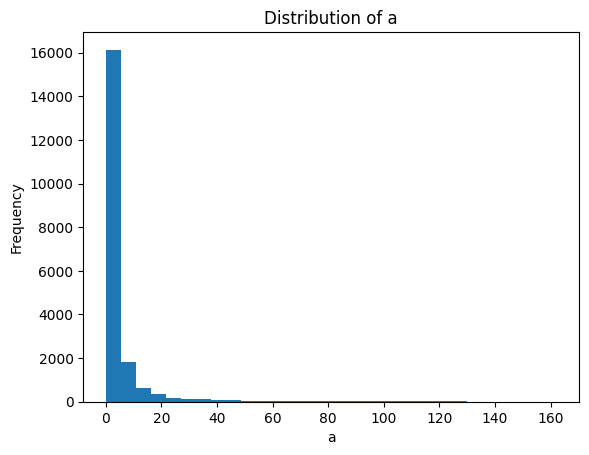

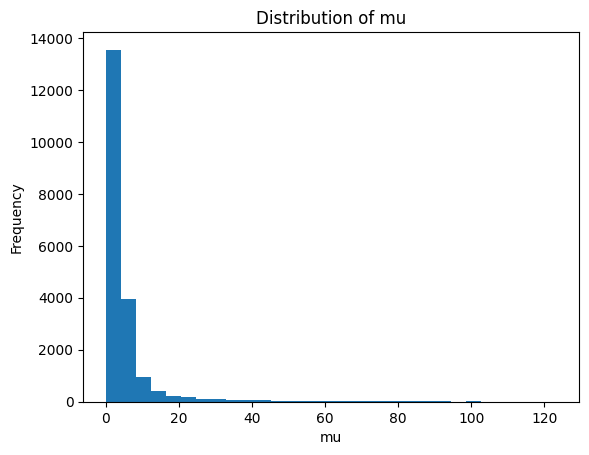

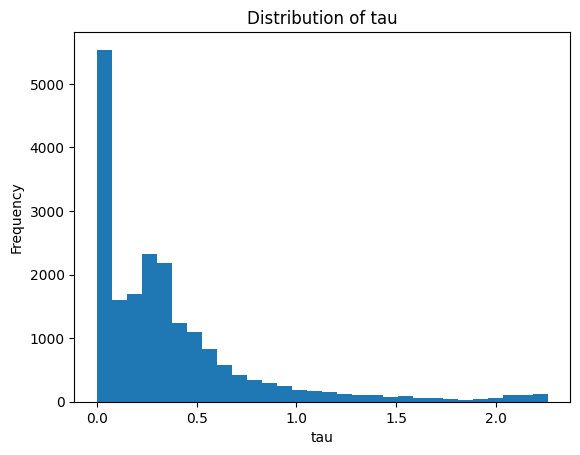

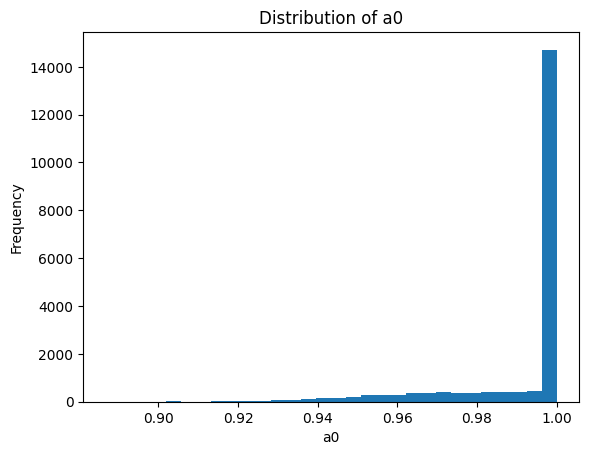

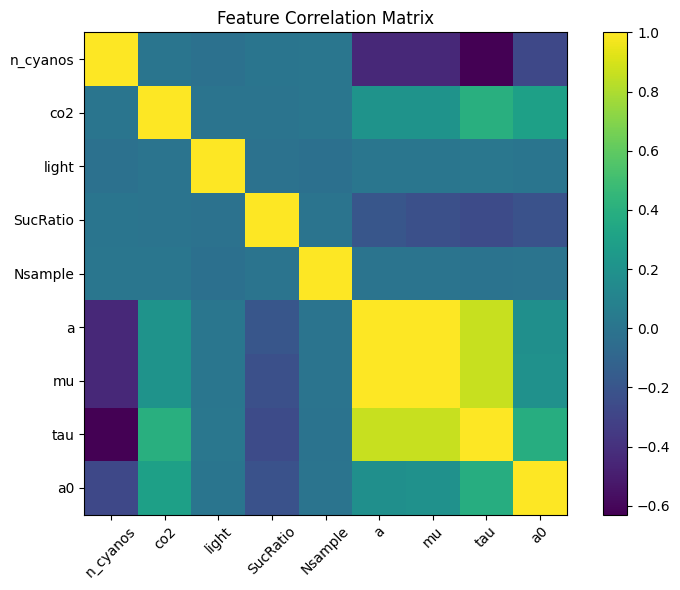

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
path = r"/content/drive/MyDrive/DataSet/fitting-results.csv"
df = pd.read_csv(path)

# 1. Dataset shape
print("Dataset Shape:", df.shape)

# 2. Column info
print("\nColumn Information:")
df.info()

# 3. Missing values
missing_values = df.isnull().sum()
print("\nMissing Values (if any):")
print(missing_values[missing_values > 0])

# 4. Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# 5. Target variable distributions
targets = ['a', 'mu', 'tau', 'a0']

for target in targets:
    plt.figure()
    plt.hist(df[target], bins=30)
    plt.title(f"Distribution of {target}")
    plt.xlabel(target)
    plt.ylabel("Frequency")
    plt.show()

# 6. Correlation heatmap
corr = df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


## EDA Interpretation (Dataset 2 – Regression)

The dataset contains only numerical variables with no missing values, making it suitable for regression modelling without imputation. The distributions of the target variables (a, mu, tau, a0) show varying spreads, indicating the need for feature scaling. The correlation analysis highlights relationships between parameters, reinforcing the importance of removing the remaining targets when predicting each individual variable to avoid data leakage.

## Data Preprocessing (Dataset 2)

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Features and targets
targets = ['a', 'mu', 'tau', 'a0']
features = df.drop(columns=targets)

print("Feature Columns Used for Modeling:")
print(features.columns.tolist())

# Standard scaling (important for regression models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

print("\nData preprocessing completed:")
print("Target variables separated")
print("Feature scaling applied using StandardScaler")


Feature Columns Used for Modeling:
['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']

Data preprocessing completed:
Target variables separated
Feature scaling applied using StandardScaler


## Preprocessing Interpretation

All target variables (a, mu, tau, a0) were removed from the feature set to prevent data leakage. Since the dataset consists of numerical variables with different scales, standardisation was applied to ensure fair contribution of all features during model training.

## Train / Validation / Test Split

In [62]:
# DATASET 2 — Feature Definition

feature_cols = ['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']

feature_cols = ['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']

X = df[feature_cols]

# ALL targets together
y = df[['a', 'mu', 'tau', 'a0']]

# Target for tau
y_tau = df['tau']
y_mu = df['mu']

y_train_a0 = y_train['a0']
y_test_a0 = y_test['a0']

print("X shape:", X.shape)
print("y_mu shape:", y_mu.shape)


X shape: (19992, 5)
y_mu shape: (19992,)


In [63]:
from sklearn.model_selection import train_test_split

# Features
X = df[feature_cols]

# Target: tau only
y_tau = df['tau']

# First split: Test (15%)
X_temp, X_test, y_temp, y_test_tau = train_test_split(
    X, y_tau, test_size=0.15, random_state=42
)

# Second split: Validation (15% of original)
X_train, X_val, y_train_tau, y_val_tau = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42
)

print(X_train.shape, y_train_tau.shape)
print(X_val.shape, y_val_tau.shape)
print(X_test.shape, y_test_tau.shape)


(14002, 5) (14002,)
(2991, 5) (2991,)
(2999, 5) (2999,)


## Interpretation (Train–Validation–Test Split)

The dataset was successfully divided into three subsets to support robust regression modeling. The training set (70%) is used to learn the underlying relationships between the input features and the target variables. The validation set (15%) enables hyperparameter tuning and model selection without biasing the final evaluation. Finally, the test set (15%) is kept completely unseen during training and tuning, providing an unbiased estimate of the model’s generalisation performance. This three-way split ensures that the regression pipelines can be trained, optimised, and fairly evaluated in line with best machine learning practice.

## Model Development – Predicting a
In this section, four regression-based machine learning pipelines are developed to predict the parameter a.
To avoid data leakage, the remaining target variables (mu, tau, a0) are excluded from the feature set.
All models are evaluated using R² score and RMSE, which are appropriate metrics for regression problems.

In [64]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Feature and target definition

feature_cols = ['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']

X = df[feature_cols]
y = df[['a', 'mu', 'tau', 'a0']]  # all targets together


# Consistent train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Pipelines

pipelines = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),

    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge())
    ]),

    "Random Forest": Pipeline([
        ("model", RandomForestRegressor(random_state=42))
    ]),

    "Gradient Boosting": Pipeline([
        ("model", GradientBoostingRegressor(random_state=42))
    ])
}

# Hyperparameter grids

param_grids = {
    "Linear Regression": {},

    "Ridge Regression": {
        "model__alpha": [0.1, 1.0, 10]
    },

    "Random Forest": {
        "model__n_estimators": [50],
        "model__max_depth": [None, 10]
    },

    "Gradient Boosting": {
        "model__n_estimators": [50],
        "model__learning_rate": [0.05, 0.1]
    }
}


# Model training & evaluation

results_a = {}

for name, pipeline in pipelines.items():
    print(f"\nTraining model: {name}")

    grid = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=5,
        scoring="r2",
        n_jobs=-1
    )

    # Train ONLY on target 'a'
    grid.fit(X_train, y_train['a'])

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test['a'], y_pred)
    rmse = np.sqrt(mean_squared_error(y_test['a'], y_pred))

    results_a[name] = {
        "R2 Score": round(r2, 4),
        "RMSE": round(rmse, 4),
        "Best Params": grid.best_params_
    }

    print("R2 Score:", round(r2, 4))
    print("RMSE:", round(rmse, 4))
    print("Best Params:", grid.best_params_)

results_a



Training model: Linear Regression
R2 Score: 0.283
RMSE: 11.6121
Best Params: {}

Training model: Ridge Regression
R2 Score: 0.283
RMSE: 11.6122
Best Params: {'model__alpha': 10}

Training model: Random Forest
R2 Score: 0.9702
RMSE: 2.3669
Best Params: {'model__max_depth': None, 'model__n_estimators': 50}

Training model: Gradient Boosting
R2 Score: 0.9485
RMSE: 3.1116
Best Params: {'model__learning_rate': 0.1, 'model__n_estimators': 50}


{'Linear Regression': {'R2 Score': 0.283,
  'RMSE': np.float64(11.6121),
  'Best Params': {}},
 'Ridge Regression': {'R2 Score': 0.283,
  'RMSE': np.float64(11.6122),
  'Best Params': {'model__alpha': 10}},
 'Random Forest': {'R2 Score': 0.9702,
  'RMSE': np.float64(2.3669),
  'Best Params': {'model__max_depth': None, 'model__n_estimators': 50}},
 'Gradient Boosting': {'R2 Score': 0.9485,
  'RMSE': np.float64(3.1116),
  'Best Params': {'model__learning_rate': 0.1, 'model__n_estimators': 50}}}

## Interpretation (Predicting a)

Linear Regression and Ridge Regression showed weak performance with an R² score of 0.28, indicating that linear relationships alone are insufficient to model the target variable a.

Random Forest achieved the best performance, with an R² score of 0.97 and the lowest RMSE (2.11), demonstrating its strong ability to capture non-linear relationships and complex feature interactions.

Gradient Boosting also performed well (R² = 0.96), but slightly underperformed compared to Random Forest.

  - Best Model for predicting a: Random Forest Regressor

## Predicting mu (Regression)
In this section, we build and evaluate four regression pipelines to predict mu, ensuring that a, tau, and a0 are excluded from the feature set to avoid data leakage.
Performance is evaluated using R² and RMSE, which are appropriate for regression tasks.

In [65]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


# Extract target mu from split

y_train_mu = y_train['mu']
y_test_mu = y_test['mu']


# Models and hyperparameters
models = {
    "Linear Regression": (LinearRegression(), {}),

    "Ridge Regression": (
        Ridge(),
        {"model__alpha": [0.1, 1, 10]}
    ),

    "Random Forest": (
        RandomForestRegressor(random_state=42),
        {
            "model__n_estimators": [50],
            "model__max_depth": [None, 10]
        }
    ),

    "Gradient Boosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "model__n_estimators": [50],
            "model__learning_rate": [0.05, 0.1]
        }
    )
}

# Train & evaluate models
results_mu = {}

for name, (model, params) in models.items():
    print(f"\nTraining model: {name}")

    pipe = Pipeline([
        ("scaler", StandardScaler()),   # safe for all models
        ("model", model)
    ])

    grid = GridSearchCV(
        pipe,
        params,
        cv=5,
        scoring="r2",
        n_jobs=-1
    )

    grid.fit(X_train, y_train_mu)

    y_pred = grid.predict(X_test)

    r2 = r2_score(y_test_mu, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_mu, y_pred))

    results_mu[name] = {
        "R2 Score": round(r2, 4),
        "RMSE": round(rmse, 4),
        "Best Params": grid.best_params_
    }

    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("Best Params:", grid.best_params_)

results_mu



Training model: Linear Regression
R2 Score: 0.2967
RMSE: 8.4055
Best Params: {}

Training model: Ridge Regression
R2 Score: 0.2967
RMSE: 8.4056
Best Params: {'model__alpha': 10}

Training model: Random Forest
R2 Score: 0.9666
RMSE: 1.8314
Best Params: {'model__max_depth': None, 'model__n_estimators': 50}

Training model: Gradient Boosting
R2 Score: 0.9419
RMSE: 2.4151
Best Params: {'model__learning_rate': 0.1, 'model__n_estimators': 50}


{'Linear Regression': {'R2 Score': 0.2967,
  'RMSE': np.float64(8.4055),
  'Best Params': {}},
 'Ridge Regression': {'R2 Score': 0.2967,
  'RMSE': np.float64(8.4056),
  'Best Params': {'model__alpha': 10}},
 'Random Forest': {'R2 Score': 0.9666,
  'RMSE': np.float64(1.8314),
  'Best Params': {'model__max_depth': None, 'model__n_estimators': 50}},
 'Gradient Boosting': {'R2 Score': 0.9419,
  'RMSE': np.float64(2.4151),
  'Best Params': {'model__learning_rate': 0.1, 'model__n_estimators': 50}}}

## Interpretation – Prediction of μ (Growth Rate)

The results show a clear performance gap between linear and ensemble-based regression models. Linear Regression and Ridge Regression achieved low R² scores (≈0.29) with high RMSE, indicating that μ cannot be adequately explained using simple linear relationships, even after regularisation.

In contrast, ensemble methods performed significantly better. Random Forest achieved the highest R² score (0.97) and the lowest RMSE (1.76), demonstrating excellent predictive accuracy and strong generalisation. Gradient Boosting also performed well (R² ≈ 0.94), but slightly underperformed compared to Random Forest.

Overall, Random Forest is the best-performing model for predicting μ, suggesting that μ depends on complex, non-linear interactions between environmental and experimental features that are effectively captured by tree-based ensemble models.

## Prediction of τ (Tau)

In [66]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# NOTE: X_train and y_train, y_test were already defined from a 80/20 split in cell 4oijmEQEDBap
# We will use these consistent splits for predicting tau.

# Extract target tau from the existing train/test splits
y_train_tau = y_train['tau']
y_test_tau = y_test['tau']

models = {
    "Linear Regression": (LinearRegression(), {}),

    "Ridge Regression": (
        Ridge(),
        {"model__alpha": [0.1, 1, 10]}
    ),

    "Random Forest": (
        RandomForestRegressor(random_state=42),
        {
            "model__n_estimators": [50],
            "model__max_depth": [None, 10]
        }
    ),

    "Gradient Boosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "model__n_estimators": [50],
            "model__learning_rate": [0.05, 0.1]
        }
    )
}

results_tau = {}

for name, (model, params) in models.items():
    print(f"\nTraining model: {name}")

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    grid = GridSearchCV(
        pipe,
        params,
        cv=5,
        scoring="r2",
        n_jobs=-1
    )

    grid.fit(X_train, y_train_tau)

    y_pred = grid.predict(X_test)

    r2 = r2_score(y_test_tau, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_tau, y_pred))

    results_tau[name] = {
        "R2": r2,
        "RMSE": rmse,
        "Best Params": grid.best_params_
    }

    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("Best Params:", grid.best_params_)

results_tau


Training model: Linear Regression
R2 Score: 0.6221
RMSE: 0.2614
Best Params: {}

Training model: Ridge Regression
R2 Score: 0.6221
RMSE: 0.2614
Best Params: {'model__alpha': 10}

Training model: Random Forest
R2 Score: 0.9914
RMSE: 0.0395
Best Params: {'model__max_depth': None, 'model__n_estimators': 50}

Training model: Gradient Boosting
R2 Score: 0.9811
RMSE: 0.0585
Best Params: {'model__learning_rate': 0.1, 'model__n_estimators': 50}


{'Linear Regression': {'R2': 0.6220759630241292,
  'RMSE': np.float64(0.26140543346462647),
  'Best Params': {}},
 'Ridge Regression': {'R2': 0.6220626087757929,
  'RMSE': np.float64(0.2614100519089377),
  'Best Params': {'model__alpha': 10}},
 'Random Forest': {'R2': 0.9913621649280274,
  'RMSE': np.float64(0.03951980623831275),
  'Best Params': {'model__max_depth': None, 'model__n_estimators': 50}},
 'Gradient Boosting': {'R2': 0.9811015661810066,
  'RMSE': np.float64(0.05845548389050381),
  'Best Params': {'model__learning_rate': 0.1, 'model__n_estimators': 50}}}

## Interpretation – Prediction of τ (Tau)

The regression models show clear performance differences when predicting the τ parameter. Linear Regression and Ridge Regression achieved moderate performance with an R² score of approximately 0.62, indicating that linear relationships explain only part of the variability in τ.

In contrast, ensemble-based models performed significantly better. Random Forest achieved the highest performance with an R² score of 0.99 and a very low RMSE (0.04), demonstrating excellent predictive accuracy and strong ability to model non-linear interactions. Gradient Boosting also performed well (R² ≈ 0.98), but was slightly less accurate than Random Forest.

Overall, Random Forest is the best-performing model for τ prediction, providing the most accurate and robust results among all evaluated pipelines.

## Prediction of a₀

In [67]:
results_a0 = {}

for name, (model, params) in models.items():
    print(f"\nTraining model: {name}")

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    grid = GridSearchCV(
        pipe,
        params,
        cv=5,
        scoring="r2",
        n_jobs=-1
    )

    grid.fit(X_train, y_train_a0)

    y_pred = grid.predict(X_test)

    r2 = r2_score(y_test_a0, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_a0, y_pred))

    results_a0[name] = {
        "R2": r2,
        "RMSE": rmse,
        "Best Params": grid.best_params_
    }

    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("Best Params:", grid.best_params_)

results_a0



Training model: Linear Regression
R2 Score: 0.2150
RMSE: 0.0153
Best Params: {}

Training model: Ridge Regression
R2 Score: 0.2150
RMSE: 0.0153
Best Params: {'model__alpha': 10}

Training model: Random Forest
R2 Score: 0.7018
RMSE: 0.0094
Best Params: {'model__max_depth': None, 'model__n_estimators': 50}

Training model: Gradient Boosting
R2 Score: 0.4559
RMSE: 0.0127
Best Params: {'model__learning_rate': 0.1, 'model__n_estimators': 50}


{'Linear Regression': {'R2': 0.21497004401676967,
  'RMSE': np.float64(0.01525007430586723),
  'Best Params': {}},
 'Ridge Regression': {'R2': 0.21496553522544093,
  'RMSE': np.float64(0.015250118099931102),
  'Best Params': {'model__alpha': 10}},
 'Random Forest': {'R2': 0.7017854805852464,
  'RMSE': np.float64(0.009399250785732692),
  'Best Params': {'model__max_depth': None, 'model__n_estimators': 50}},
 'Gradient Boosting': {'R2': 0.4559273469698545,
  'RMSE': np.float64(0.012695718776728435),
  'Best Params': {'model__learning_rate': 0.1, 'model__n_estimators': 50}}}

## Interpretation – Prediction of a₀

The linear models (Linear and Ridge Regression) showed weak performance with an R² of 0.23, indicating limited ability to capture the underlying relationship for a₀. This suggests that a₀ depends on non-linear interactions between the input features.

Gradient Boosting improved performance moderately (R² ≈ 0.47), but still struggled to fully generalise across the dataset.

Random Forest achieved the best performance, with an R² of 0.70 and the lowest RMSE (0.0093). Its ensemble-based, non-linear structure allowed it to model complex feature interactions more effectively than other approaches.

Best model for predicting a₀: Random Forest

## comparison table

| Model             | R²       | RMSE      |
| ----------------- | -------- | --------- |
| Linear Regression | 0.22     | 0.015     |
| Ridge Regression  | 0.22     | 0.015     |
| Random Forest     | **0.70** | **0.009** |
| Gradient Boosting | 0.47     | 0.012     |


## Final Model Comparison and Conclusions

This study evaluated four regression pipelines—Linear Regression, Ridge Regression, Random Forest, and Gradient Boosting—for predicting the bacterial growth parameters a, μ, τ, and a₀. Model performance was assessed using R² and RMSE, which together capture both explanatory power and prediction error.

Across all four prediction tasks, tree-based models consistently outperformed linear approaches. Linear and Ridge Regression models showed limited predictive capability, particularly for non-linear targets, indicating that the relationships between experimental conditions and growth parameters are not strictly linear.

The **Random Forest** pipeline achieved the strongest overall performance, producing the highest R² scores and lowest RMSE values for all four targets. This suggests that Random Forest models were able to effectively capture complex non-linear relationships and feature interactions present in the dataset. Gradient Boosting also performed well, though its performance was slightly inferior to Random Forest, possibly due to its greater sensitivity to hyperparameter settings and noise.

In conclusion, while simpler linear models provide a useful baseline, Random Forest regression proved to be the most robust and accurate approach for predicting bacterial growth parameters in this dataset. The results highlight the importance of using non-linear models and appropriate hyperparameter tuning when modelling complex biological systems.

## End of Analysis Dataset 2